# Heart Disease Prediction using Machine Learning

## Project ID: PRCP-1016-HeartDiseasePred

## Domain: Healthcare

Cardiovascular diseases (CVDs) are among the leading causes of death worldwide.
Early detection and risk prediction can help hospitals take preventive actions
and reduce life-threatening events.

This project focuses on:
- Analyzing patient health data
- Predicting the presence of heart disease using machine learning models
- Providing actionable suggestions to hospitals based on predictions

In [40]:
# libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Warning control
import warnings
warnings.filterwarnings("ignore")


In [2]:
# plot style
sns.set(style="whitegrid")

# Display all columns
pd.set_option("display.max_columns", None)

# plot size
plt.rcParams["figure.figsize"] = (8, 5)


# Data Description

In [3]:
# Load feature dataset (14 columns)
features = pd.read_csv("values.csv")

# Load target dataset (patient_id + target)
target = pd.read_csv("labels.csv")

# Preview datasets
features.head()
target.head()


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
# Merge on patient_id
df = pd.merge(features, target, on="patient_id", how="inner")

# Check merged dataset
df.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [6]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


## Data Cleaning Summary

- The dataset contains 180 patient records with no missing values across all columns.
- Data types are appropriate for most variables.
- The `patient_id` column is an identifier and will be excluded from modeling.
- The `thal` feature is categorical and will be encoded during feature engineering.
- Certain numerical variables contain extreme but medically valid values and were retained.


## Exploratory Data Analysis (EDA) – Part 1

In this section, we perform an exploratory analysis to understand the distribution
of the target variable and key patient features. This helps identify patterns,
imbalances, and potential risk indicators before building machine learning models.


In [7]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

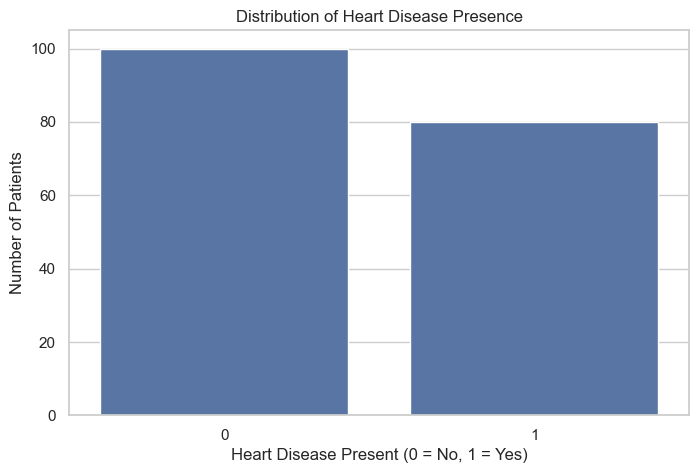

In [8]:
sns.countplot(x='heart_disease_present', data=df)
plt.title("Distribution of Heart Disease Presence")
plt.xlabel("Heart Disease Present (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

Out of 180 patients, 100 do not have heart disease while 80 are diagnosed with heart disease. 

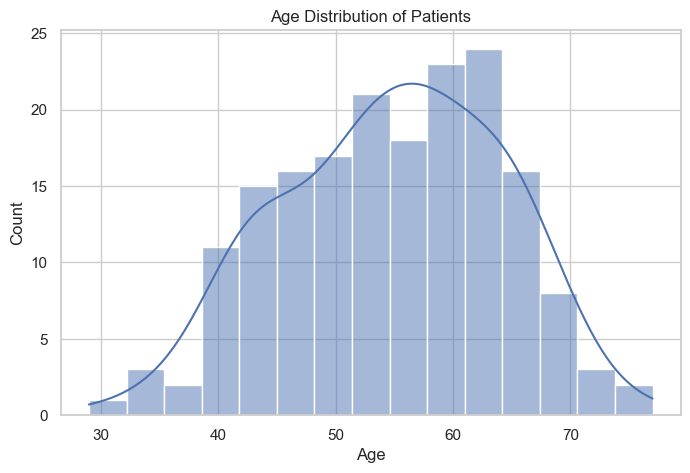

In [9]:
sns.histplot(df.age, bins=15, kde=True) #bins is to group the age instead of excat age
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Age distribution plot shows that most of the patients belongs to the middle-aged to older-age. This includes all patients regardless of their heart disease status.

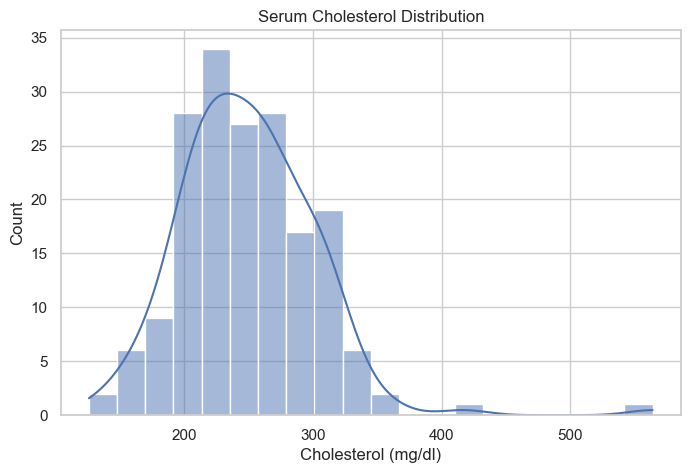

In [10]:
sns.histplot(df.serum_cholesterol_mg_per_dl, bins=20, kde=True) #bins is to group the age instead of excat age
plt.title("Serum Cholesterol Distribution")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.show()

The serum cholesterol distribution is right-skewed, with a large proportion of patients having cholesterol levels above the recommended normal threshold of 200 mg/dl. A small number of patients exhibit extremely high cholesterol values, representing high-risk cases.


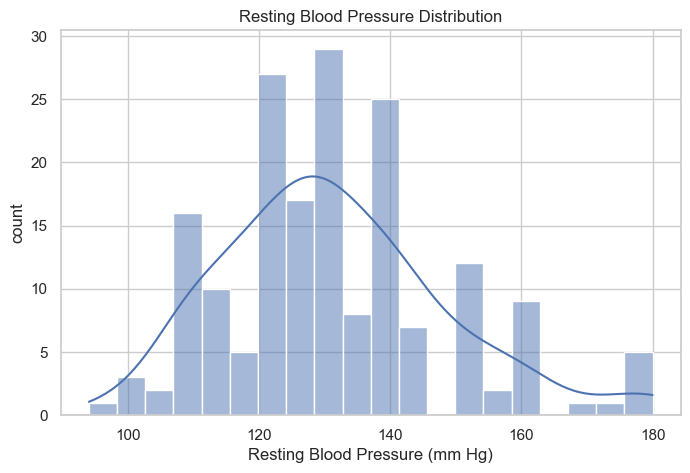

In [11]:
sns.histplot(df.resting_blood_pressure, bins=20,kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('count')
plt.show()

The resting blood pressure values fall within medically realistic ranges,
with no patients exhibiting extremely low (<80 mm Hg) or extremely high
(>200 mm Hg) values. Most patients have blood pressure readings between
120 and 140 mm Hg, indicating a predominance of pre-hypertensive individuals.
A smaller proportion of patients fall within the hypertensive range
(140–180 mm Hg).

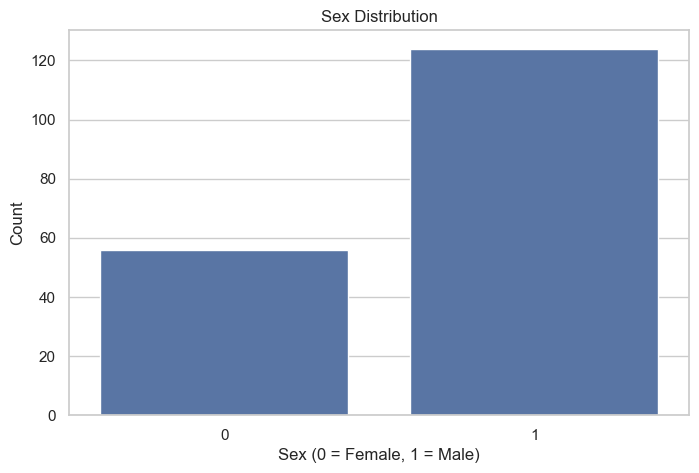

In [12]:
sns.countplot(x='sex', data=df)
plt.title("Sex Distribution")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

The dataset contains a higher number of male patients compared to female patients. Approximately 120 patients are male, while fewer than 60 patients are female. This distribution is consistent with real-world cardiovascular datasets, where male patients are often more represented due to higher revalence and earlier onset of heart disease.

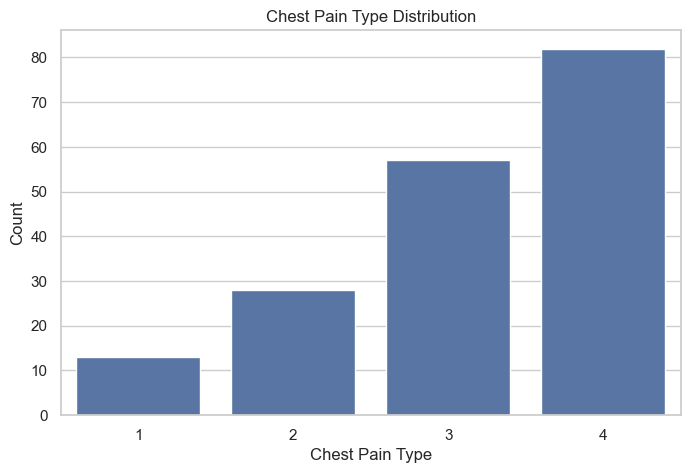

In [13]:
sns.countplot(x='chest_pain_type', data=df)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

The distribution of chest pain types shows that asymptomatic cases (chest pain type 4) are the most common, followed by non-anginal pain (type 3). Atypical angina (type 2) occurs less frequently, while typical angina (type 1) is the least common. This indicates that a significant portion of patients may exhibit minimal or no chest pain despite being part of a cardiovascular risk-focused dataset.


## Exploratory Data Analysis (EDA) – Part 2

In this section, we analyze the relationship between key patient features and the target variable (`heart_disease_present`) to understand how different attributes vary between patients with and without heart disease.


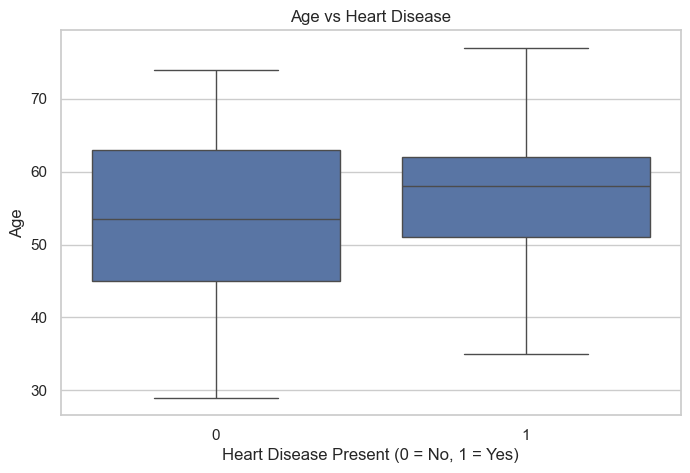

In [14]:
sns.boxplot(x='heart_disease_present', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease Present (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

The boxplot shows that patients with heart disease tend to be older than those without heart disease. The median age for patients with heart disease
is higher, and the lower quartile is also shifted toward older ages. However, there is noticeable overlap between the two groups, indicating
that while age is an important risk factor, it alone is not sufficient to distinguish heart disease presence.


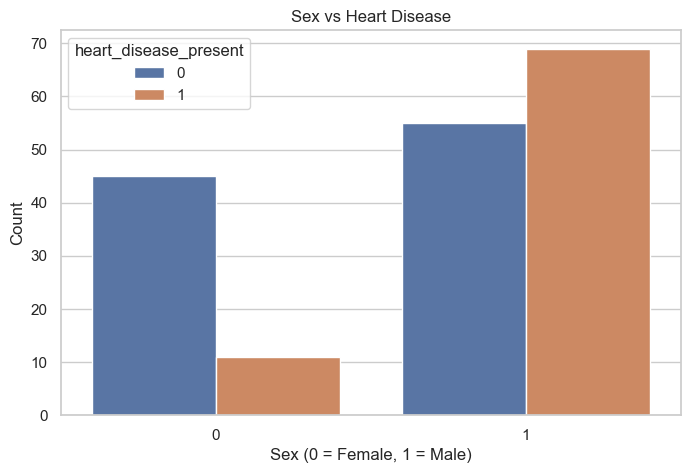

In [15]:
sns.countplot(x='sex', hue='heart_disease_present', data=df)
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

The distribution shows that heart disease is more prevalent among male patients compared to female patients in this dataset. While the majority
of female patients do not exhibit heart disease, a substantial number of male patients are affected. This observation aligns with known
epidemiological patterns where males are at higher risk of developing cardiovascular disease.


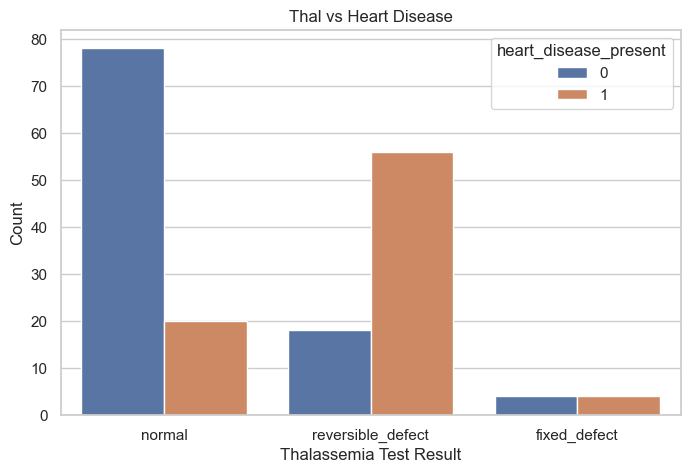

In [16]:
sns.countplot(x='thal', hue='heart_disease_present', data=df)
plt.title("Thal vs Heart Disease")
plt.xlabel("Thalassemia Test Result")
plt.ylabel("Count")
plt.show()

Patients with normal thal results predominantly do not exhibit heart disease, indicating healthy blood flow to the heart. In contrast, patients with
reversible defects show a significantly higher occurrence of heart disease, highlighting a strong association between reversible ischemia and cardiovascular risk. Fixed defects are observed in very few patients and appear consistently across both classes, limiting their standalone predictive significance.

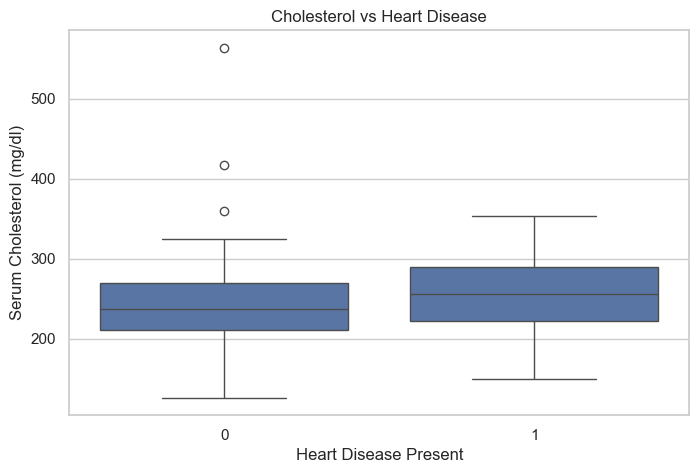

In [17]:
sns.boxplot(x='heart_disease_present',
            y='serum_cholesterol_mg_per_dl',
            data=df)
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease Present")
plt.ylabel("Serum Cholesterol (mg/dl)")
plt.show()

Patients with heart disease exhibit slightly higher serum cholesterol levels compared to those without heart disease, as reflected by a higher central
tendency and an upward shift in the interquartile range. However, there is substantial overlap between the two groups, indicating that cholesterol alone cannot distinctly separate heart disease presence. Extreme cholesterol values are observed primarily in the non–heart disease group, highlighting that heart disease is influenced by multiple interacting risk factors rather than a single measure.

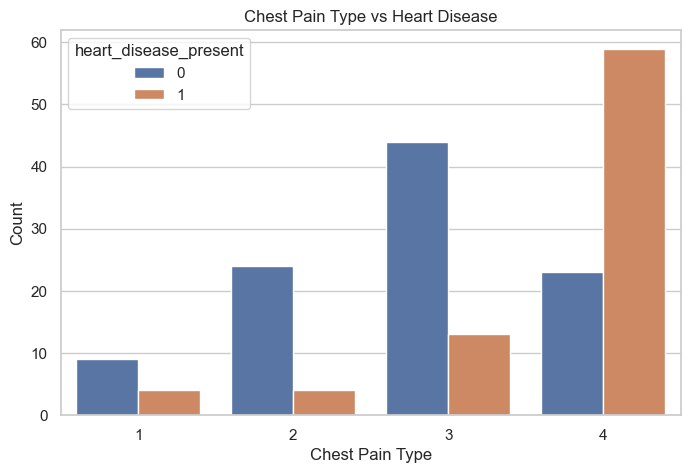

In [18]:
sns.countplot(x='chest_pain_type', hue='heart_disease_present', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

The distribution of chest pain types shows a strong association between asymptomatic chest pain (type 4) and heart disease. A majority of patients
with heart disease fall under chest pain type 4, whereas most patients with chest pain types 1 and 2 do not exhibit heart disease. Non-anginal pain
(type 3) shows a moderate presence in heart disease cases. This indicates that the absence of chest pain does not imply lower cardiovascular risk and
highlights chest pain type as an important categorical predictor.

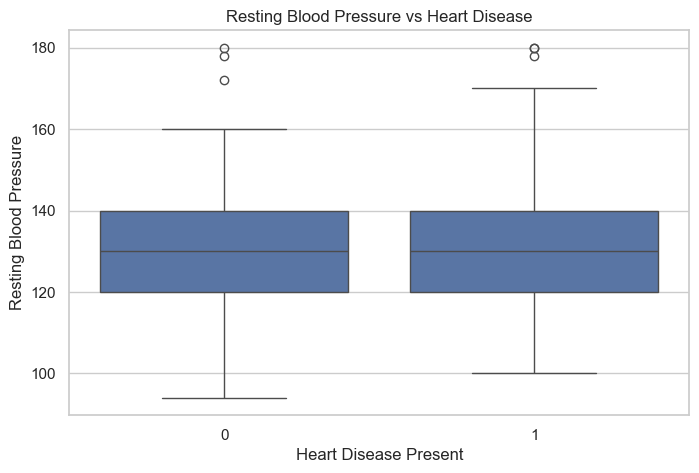

In [19]:
sns.boxplot(x='heart_disease_present',
            y='resting_blood_pressure',
            data=df)
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease Present")
plt.ylabel("Resting Blood Pressure")
plt.show()

The boxplot comparison shows substantial overlap in resting blood pressure values between patients with and without heart disease. The interquartile
ranges and median values are nearly identical for both groups, indicating that resting blood pressure alone does not effectively distinguish heart
disease presence in this dataset. Although elevated blood pressure is a known risk factor, it appears to have limited standalone predictive power here.

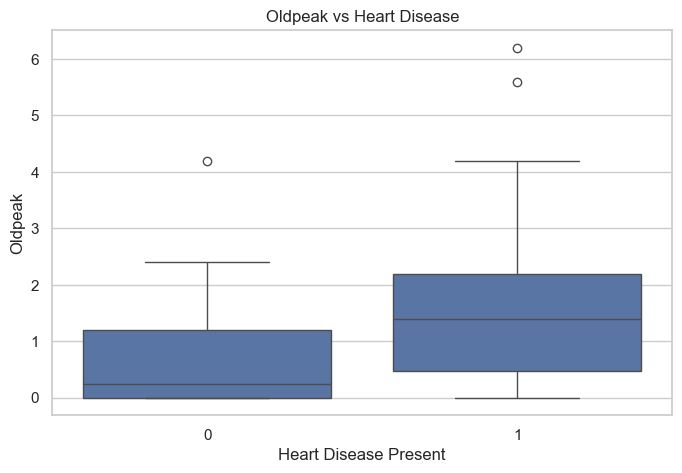

In [20]:
sns.boxplot(x='heart_disease_present',
            y='oldpeak_eq_st_depression',
            data=df)
plt.title("Oldpeak vs Heart Disease")
plt.xlabel("Heart Disease Present")
plt.ylabel("Oldpeak")
plt.show()


Oldpeak values show a clear upward shift in patients with heart disease compared to those without. While some overlap exists at lower values, the median and upper quartiles for heart disease patients are substantially higher, and extreme oldpeak values are observed almost exclusively
in this group. This indicates that oldpeak is a strong indicator of heart disease presence, even though it does not provide perfect separation on
its own.

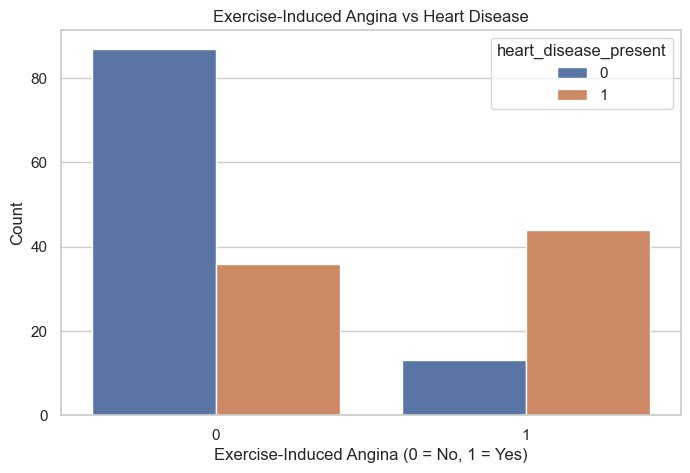

In [21]:
sns.countplot(x='exercise_induced_angina',
              hue='heart_disease_present',
              data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Exercise-induced angina is more common among patients with heart disease; however, a notable number of patients without heart disease also report
angina during exercise. While the presence of exercise-induced angina increases the likelihood of heart disease, it does not provide definitive
separation between the two groups. In contrast, the absence of exercise-induced angina is strongly associated with the absence of heart disease.
This suggests that exercise-induced angina is a useful but non-exclusive risk indicator.

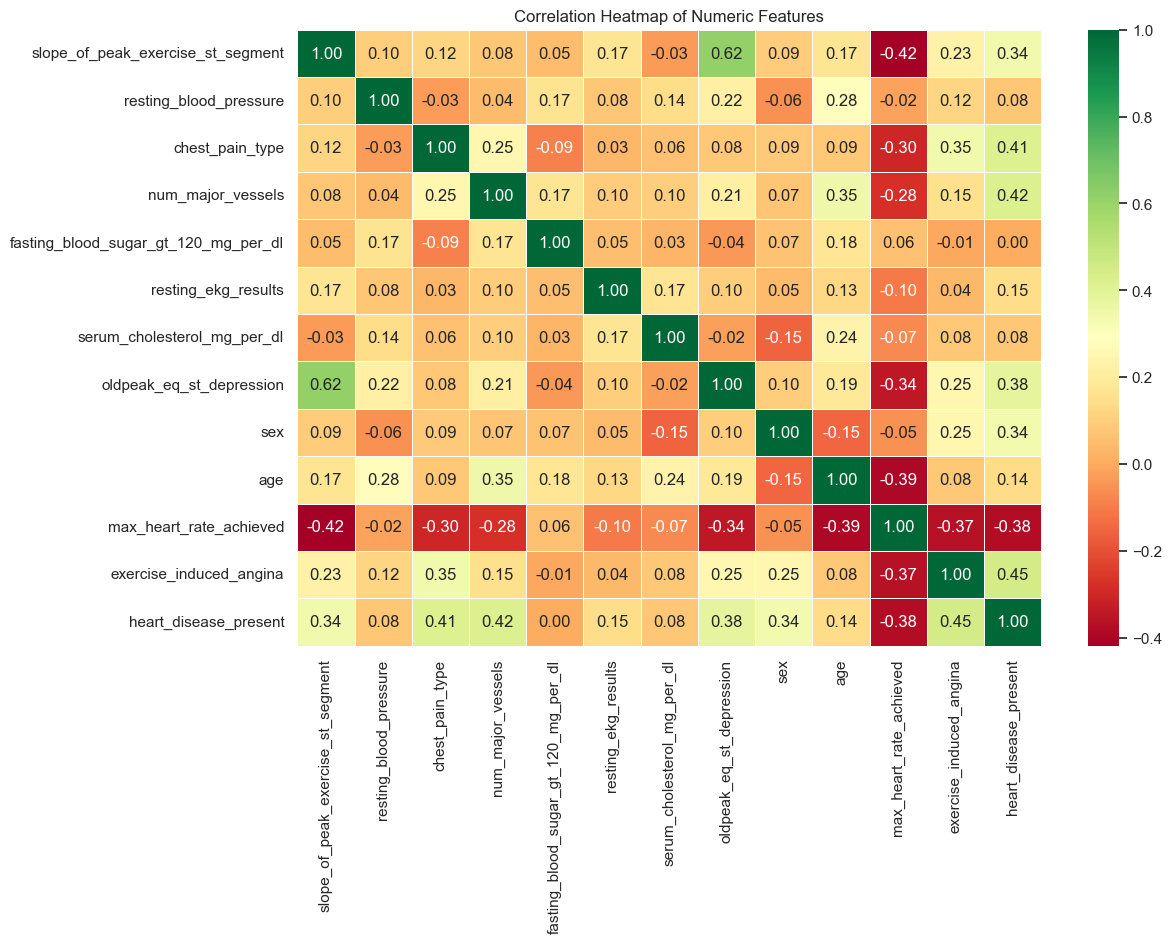

In [22]:
# Select only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Red indicates strong positive correlation, green indicates strong negative correlation, and yellow represents weak or no linear relationship.

# Feature Engineering and Encoding

In [23]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [24]:
df = df.drop(columns=['patient_id'])

In [25]:
df.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [26]:
X = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']
X.shape, y.shape

((180, 13), (180,))

In [27]:
X = pd.get_dummies( X, columns=['thal', 'chest_pain_type'], drop_first=True)

In [28]:
X.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4
0,1,128,0,0,2,308,0.0,1,45,170,0,True,False,True,False,False
1,2,110,0,0,0,214,1.6,0,54,158,0,True,False,False,True,False
2,1,125,3,0,2,304,0.0,1,77,162,1,True,False,False,False,True
3,1,152,0,0,0,223,0.0,1,40,181,0,False,True,False,False,True
4,3,178,0,0,2,270,4.2,1,59,145,0,False,True,False,False,False


# Train-Test-Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2,random_state=42,stratify=y)

In [30]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

heart_disease_present
0    0.555556
1    0.444444
Name: proportion, dtype: float64

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled.shape
X_test_scaled.shape
# shape is correct

(36, 16)

In [33]:
np.isnan(X_train_scaled).sum()
np.isnan(X_test_scaled).sum()
# no null values

np.int64(0)

# Model Building

In [34]:
#creaating a evalution model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [35]:
#logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

log_results = evaluate_model(log_reg, X_test_scaled, y_test)
log_results


{'Accuracy': 0.8888888888888888,
 'Precision': 0.8,
 'Recall': 1.0,
 'F1-score': 0.8888888888888888,
 'Confusion Matrix': array([[16,  4],
        [ 0, 16]])}

In [36]:
#decision tree model
dt = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)
dt_results = evaluate_model(dt, X_test, y_test)
dt_results


{'Accuracy': 0.7222222222222222,
 'Precision': 0.6875,
 'Recall': 0.6875,
 'F1-score': 0.6875,
 'Confusion Matrix': array([[15,  5],
        [ 5, 11]])}

In [37]:
#random forest model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)
rf_results = evaluate_model(rf, X_test, y_test)
rf_results


{'Accuracy': 0.8611111111111112,
 'Precision': 0.7894736842105263,
 'Recall': 0.9375,
 'F1-score': 0.8571428571428571,
 'Confusion Matrix': array([[16,  4],
        [ 1, 15]])}

In [38]:
#k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)
knn_results = evaluate_model(knn, X_test_scaled, y_test)
knn_results


  File "C:\Users\dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


{'Accuracy': 0.8611111111111112,
 'Precision': 0.7894736842105263,
 'Recall': 0.9375,
 'F1-score': 0.8571428571428571,
 'Confusion Matrix': array([[16,  4],
        [ 1, 15]])}

In [41]:
#svm 
svm = SVC(
    kernel='rbf',
    probability=False,
    random_state=42
)

svm.fit(X_train_scaled, y_train)
svm_results = evaluate_model(svm, X_test_scaled, y_test)
svm_results


{'Accuracy': 0.8611111111111112,
 'Precision': 0.7894736842105263,
 'Recall': 0.9375,
 'F1-score': 0.8571428571428571,
 'Confusion Matrix': array([[16,  4],
        [ 1, 15]])}

# Model Comparison

In [42]:
comparison = pd.DataFrame({
    "Logistic Regression": log_results,
    "Decision Tree": dt_results,
    "Random Forest": rf_results,
    "KNN": knn_results,
    "SVM": svm_results
}).T

comparison


,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Logistic Regression,0.888889,0.8,1.0,0.888889,"[[16, 4], [0, 16]]"
Decision Tree,0.722222,0.6875,0.6875,0.6875,"[[15, 5], [5, 11]]"
Random Forest,0.861111,0.789474,0.9375,0.857143,"[[16, 4], [1, 15]]"
KNN,0.861111,0.789474,0.9375,0.857143,"[[16, 4], [1, 15]]"
SVM,0.861111,0.789474,0.9375,0.857143,"[[16, 4], [1, 15]]"


Five machine learning models were evaluated for heart disease prediction:
Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and
Support Vector Machine. Model performance was assessed using accuracy,
precision, recall, F1-score, and confusion matrices.

Logistic Regression achieved the highest recall (1.00), successfully identifying
all heart disease cases without any false negatives. While Random Forest, KNN,
and SVM also demonstrated strong performance, each missed at least one heart
disease case. Decision Tree showed comparatively lower performance across all
metrics.

Given the critical importance of minimizing missed diagnoses in healthcare
applications, Logistic Regression was selected as the final model due to its
perfect recall, strong overall performance, and high interpretability.

# Hospital Recommendations

Based on the exploratory data analysis and predictive modeling results, the following recommendations are proposed to support early detection and management of heart disease in clinical settings:

1. **Prioritize Oldpeak Monitoring**  
   Elevated oldpeak values showed the strongest association with heart disease.
   Patients exhibiting higher ST depression during exercise should be closely
   monitored and considered for further diagnostic evaluation.

2. **Incorporate Stress Test Results in Routine Screening**  
   Abnormal thallium stress test results, particularly reversible defects, were
   highly prevalent among heart disease patients. Stress test findings should
   be integrated into routine cardiovascular risk assessments.

3. **Do Not Rely Solely on Chest Pain Symptoms**  
   A significant number of heart disease patients were asymptomatic or exhibited
   non-typical chest pain. Absence of chest pain should not be used as a rule-out
   criterion for heart disease.

4. **Use Exercise-Induced Angina as a Risk Indicator, Not a Diagnostic Marker**  
   While exercise-induced angina increases the likelihood of heart disease, its
   presence alone is not definitive. It should be evaluated alongside other
   clinical features such as ECG changes and vessel involvement.

5. **Leverage Predictive Models for Decision Support**  
   The Logistic Regression model demonstrated high recall and can be used as a
   decision-support tool to flag high-risk patients for further testing, rather
   than as a standalone diagnostic system.

6. **Adopt a Multivariable Risk Assessment Approach**  
   Traditional risk factors such as cholesterol level and resting blood pressure
   showed limited standalone predictive power. A combined assessment of multiple
   clinical indicators yields more reliable risk stratification.

7. **Support Preventive and Follow-Up Care**  
   Patients identified as high-risk by the model should receive timely follow-up,
   lifestyle counseling, and preventive interventions to reduce potential life-
   threatening outcomes.


# Challanges Faced

1. **Small Dataset Size**  
   The dataset contained only 180 records, which limited the complexity of models
   that could be reliably used and increased the risk of overfitting.

2. **Feature Overlap Between Classes**  
   Several features such as resting blood pressure and serum cholesterol showed
   significant overlap between heart disease and non–heart disease patients,
   reducing their standalone predictive power.

3. **Handling Categorical Variables**  
   Certain features were categorical but encoded as integers, requiring careful
   identification and appropriate one-hot encoding to avoid introducing false
   ordinal relationships.

4. **Balancing Recall and Precision**  
   In a healthcare context, minimizing false negatives is critical. Selecting a
   model that achieved high recall while maintaining acceptable precision required
   careful evaluation of trade-offs.

5. **Risk of Overinterpretation**  
   Correlation and model predictions do not imply causation. Care was taken to
   avoid causal claims and to frame the model strictly as a decision-support tool.

6. **Generalization to Real-World Settings**  
   The dataset represents a limited population, and model performance may vary
   across different demographics or clinical environments, which restricts direct
   generalization.


# Conclusion

This project focused on predicting the presence of heart disease using clinical and diagnostic features through exploratory data analysis and machine learning models. Detailed EDA revealed that features such as oldpeak, thallium stress test results, chest pain patterns, and exercise-related indicators were strongly associated with heart disease, while traditional risk factors like cholesterol and resting blood pressure showed limited standalone influence.

Multiple machine learning models were developed and compared, with Logistic Regression emerging as the most suitable model due to its perfect recall, strong overall performance, and high interpretability. Given the critical importance of minimizing missed diagnoses in healthcare, the selected model is well-suited as a decision-support system to assist clinicians in early risk assessment.

While the model demonstrates promising results, it is intended to complement clinical judgment rather than replace it. Future improvements could include larger and more diverse datasets, additional clinical features, and external validation to enhance robustness and generalizability.